<a href="https://colab.research.google.com/github/Adeyinka-hub/MY-MACHINE-LEARNING-AND-DEEP-LEARNING-WORKS-ON-KAGGLE-AND-ZINDI-RESPECTIVELY/blob/master/AIR_QUALITY_ZINDI_CHALLENGE(ANOTHER_ATTEMPT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Load the dataset
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error,auc,roc_auc_score

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train  = pd.read_csv("/content/drive/My Drive/train_new.csv")
test  = pd.read_csv("/content/drive/My Drive/test_new.csv")

In [ ]:
train.head()

,ID,location,target,newtemp0,newprecip0,newrel_humidity0,newwind_dir0,windspeed0,atmospherepressure0,newtemp1,newprecip1,newrel_humidity1,newwind_dir1,windspeed1,atmospherepressure1,newtemp2,newprecip2,newrel_humidity2,newwind_dir2,windspeed2,atmospherepressure2,newtemp3,newprecip3,newrel_humidity3,newwind_dir3,windspeed3,atmospherepressure3,newtemp4,newprecip4,newrel_humidity4,newwind_dir4,windspeed4,atmospherepressure4,newtemp5,newprecip5,newrel_humidity5,newwind_dir5,windspeed5,atmospherepressure5,newtemp6,newprecip6,newrel_humidity6,newwind_dir6,windspeed6,atmospherepressure6,newtemp7,newprecip7,newrel_humidity7,newwind_dir7,windspeed7,atmospherepressure7,newtemp8,newprecip8,newrel_humidity8,newwind_dir8,windspeed8,atmospherepressure8,newtemp9,newprecip9,newrel_humidity9,newwind_dir9,windspeed9,atmospherepressure9,newtemp10,newprecip10,newrel_humidity10,newwind_dir10,windspeed10,atmospherepressure10,newtemp11,newprecip11,newrel_humidity11,newwind_dir11,windspeed11,atmospherepressure11,newtemp12,newprecip12,newrel_humidity12,newwind_dir12,windspeed12,atmospherepressure12,newtemp13,newprecip13,newrel_humidity13,newwind_dir13,windspeed13,atmospherepressure13,newtemp14,newprecip14,newwind_dir14,windspeed14,atmospherepressure14,newtemp15,newprecip15,newrel_humidity15,newwind_dir15,windspeed15,atmospherepressure15,newtemp16,newprecip16,newrel_humidity16,newwind_dir16,windspeed16,atmospherepressure16,newtemp17,newprecip17,newrel_humidity17,newwind_dir17,windspeed17,atmospherepressure17,newtemp18,newprecip18,newrel_humidity18,newwind_dir18,windspeed18,atmospherepressure18,newtemp19,newprecip19,newrel_humidity19,newwind_dir19,windspeed19,atmospherepressure19,newtemp20,newprecip20,newrel_humidity20,newwind_dir20,windspeed20,atmospherepressure20,newtemp21,newprecip21,newrel_humidity21,newwind_dir21,windspeed21,atmospherepressure21,newtemp22,newprecip22,newrel_humidity22,newwind_dir22,windspeed22,atmospherepressure22,newtemp23,newprecip23,newrel_humidity23,newwind_dir23,windspeed23,atmospherepressure23,newtemp24,newprecip24,newrel_humidity24,newwind_dir24,windspeed24,atmospherepressure24,newtemp25,newprecip25,newrel_humidity25,newwind_dir25,windspeed25,atmospherepressure25,newtemp26,newprecip26,newrel_humidity26,newwind_dir26,windspeed26,atmospherepressure26,newtemp27,newprecip27,newrel_humidity27,newwind_dir27,windspeed27,atmospherepressure27,newtemp28,newprecip28,newrel_humidity28,newwind_dir28,windspeed28,atmospherepressure28,newtemp29,newprecip29,newrel_humidity29,newwind_dir29,windspeed29,atmospherepressure29,newtemp30,newprecip30,newrel_humidity30,newwind_dir30,windspeed30,atmospherepressure30,newtemp31,newprecip31,newrel_humidity31,newwind_dir31,windspeed31,atmospherepressure31,newtemp32,newprecip32,newrel_humidity32,newwind_dir32,windspeed32,atmospherepressure32,newtemp33,newprecip33,newwind_dir33,windspeed33,atmospherepressure33,newtemp34,newprecip34,newrel_humidity34,newwind_dir34,windspeed34,atmospherepressure34,newtemp35,newprecip35,newrel_humidity35,newwind_dir35,windspeed35,atmospherepressure35,newtemp36,newprecip36,newrel_humidity36,newwind_dir36,windspeed36,atmospherepressure36,newtemp37,newprecip37,newrel_humidity37,newwind_dir37,windspeed37,atmospherepressure37,newtemp38,newprecip38,newrel_humidity38,newwind_dir38,windspeed38,atmospherepressure38,newtemp39,newprecip39,newrel_humidity39,newwind_dir39,windspeed39,atmospherepressure39,newtemp40,newprecip40,newrel_humidity40,newwind_dir40,windspeed40,atmospherepressure40,newtemp41,newprecip41,newrel_humidity41,newwind_dir41,atmospherepressure41,newtemp42,newprecip42,newrel_humidity42,newwind_dir42,windspeed42,atmospherepressure42,newtemp43,newprecip43,newrel_humidity43,newwind_dir43,windspeed43,atmospherepressure43,newtemp44,newprecip44,newrel_humidity44,newwind_dir44,windspeed44,atmospherepressure44,newtemp45,newprecip45,newrel_humidity45,newwind_dir45,windspeed45,atmospherepressure45,newtemp46,newprecip46,newrel_humidity46,newwind_dir46,windspeed46,atmospherepressure46

In [ ]:
test.head()

,ID,location,newtemp0,newprecip0,newrel_humidity0,newwind_dir0,windspeed0,atmospherepressure0,newtemp1,newprecip1,newrel_humidity1,newwind_dir1,windspeed1,atmospherepressure1,newtemp2,newprecip2,newrel_humidity2,newwind_dir2,windspeed2,atmospherepressure2,newtemp3,newprecip3,newrel_humidity3,newwind_dir3,windspeed3,atmospherepressure3,newtemp4,newprecip4,newrel_humidity4,newwind_dir4,windspeed4,atmospherepressure4,newtemp5,newprecip5,newrel_humidity5,newwind_dir5,windspeed5,atmospherepressure5,newtemp6,newprecip6,newrel_humidity6,newwind_dir6,windspeed6,atmospherepressure6,newtemp7,newprecip7,newrel_humidity7,newwind_dir7,windspeed7,atmospherepressure7,newtemp8,newprecip8,newrel_humidity8,newwind_dir8,windspeed8,atmospherepressure8,newtemp9,newprecip9,newrel_humidity9,newwind_dir9,windspeed9,atmospherepressure9,newtemp10,newprecip10,newrel_humidity10,newwind_dir10,windspeed10,atmospherepressure10,newtemp11,newprecip11,newrel_humidity11,newwind_dir11,windspeed11,atmospherepressure11,newtemp12,newprecip12,newrel_humidity12,newwind_dir12,windspeed12,atmospherepressure12,newtemp13,newprecip13,newrel_humidity13,newwind_dir13,windspeed13,atmospherepressure13,newtemp14,newprecip14,newwind_dir14,windspeed14,atmospherepressure14,newtemp15,newprecip15,newrel_humidity15,newwind_dir15,windspeed15,atmospherepressure15,newtemp16,newprecip16,newrel_humidity16,newwind_dir16,windspeed16,atmospherepressure16,newtemp17,newprecip17,newrel_humidity17,newwind_dir17,windspeed17,atmospherepressure17,newtemp18,newprecip18,newrel_humidity18,newwind_dir18,windspeed18,atmospherepressure18,newtemp19,newprecip19,newrel_humidity19,newwind_dir19,windspeed19,atmospherepressure19,newtemp20,newprecip20,newrel_humidity20,newwind_dir20,windspeed20,atmospherepressure20,newtemp21,newprecip21,newrel_humidity21,newwind_dir21,windspeed21,atmospherepressure21,newtemp22,newprecip22,newrel_humidity22,newwind_dir22,windspeed22,atmospherepressure22,newtemp23,newprecip23,newrel_humidity23,newwind_dir23,windspeed23,atmospherepressure23,newtemp24,newprecip24,newrel_humidity24,newwind_dir24,windspeed24,atmospherepressure24,newtemp25,newprecip25,newrel_humidity25,newwind_dir25,windspeed25,atmospherepressure25,newtemp26,newprecip26,newrel_humidity26,newwind_dir26,windspeed26,atmospherepressure26,newtemp27,newprecip27,newrel_humidity27,newwind_dir27,windspeed27,atmospherepressure27,newtemp28,newprecip28,newrel_humidity28,newwind_dir28,windspeed28,atmospherepressure28,newtemp29,newprecip29,newrel_humidity29,newwind_dir29,windspeed29,atmospherepressure29,newtemp30,newprecip30,newrel_humidity30,newwind_dir30,windspeed30,atmospherepressure30,newtemp31,newprecip31,newrel_humidity31,newwind_dir31,windspeed31,atmospherepressure31,newtemp32,newprecip32,newrel_humidity32,newwind_dir32,windspeed32,atmospherepressure32,newtemp33,newprecip33,newwind_dir33,windspeed33,atmospherepressure33,newtemp34,newprecip34,newrel_humidity34,newwind_dir34,windspeed34,atmospherepressure34,newtemp35,newprecip35,newrel_humidity35,newwind_dir35,windspeed35,atmospherepressure35,newtemp36,newprecip36,newrel_humidity36,newwind_dir36,windspeed36,atmospherepressure36,newtemp37,newprecip37,newrel_humidity37,newwind_dir37,windspeed37,atmospherepressure37,newtemp38,newprecip38,newrel_humidity38,newwind_dir38,windspeed38,atmospherepressure38,newtemp39,newprecip39,newrel_humidity39,newwind_dir39,windspeed39,atmospherepressure39,newtemp40,newprecip40,newrel_humidity40,newwind_dir40,windspeed40,atmospherepressure40,newtemp41,newprecip41,newrel_humidity41,newwind_dir41,atmospherepressure41,newtemp42,newprecip42,newrel_humidity42,newwind_dir42,windspeed42,atmospherepressure42,newtemp43,newprecip43,newrel_humidity43,newwind_dir43,windspeed43,atmospherepressure43,newtemp44,newprecip44,newrel_humidity44,newwind_dir44,windspeed44,atmospherepressure44,newtemp45,newprecip45,newrel_humidity45,newwind_dir45,windspeed45,atmospherepressure45,newtemp46,newprecip46,newrel_humidity46,newwind_dir46,windspeed46,atmospherepressure46,newtem

In [ ]:
test_id = test['ID']

In [ ]:
train.shape, test.shape

((15539, 755), (5035, 754))

In [ ]:
X=train.drop(["ID",'target'],axis =1)
y = train.target

In [ ]:
# let's inspect the type of variables in pandas
train.dtypes

ID                     object
location                int64
target                float64
newtemp0              float64
newprecip0            float64
                       ...   
min_atmos_press       float64
mean_atmos_press      float64
std_atmos_press       float64
median_atmos_press    float64
ptp_atmos_press       float64
Length: 755, dtype: object

In [ ]:
print('Number of AQ ID labels: ', len(train.ID.unique()))
print('Number of AQ in the Dataset: ', len(train))

Number of AQ ID labels:  15539
Number of AQ in the Dataset:  15539


In [ ]:
train.columns

Index(['ID', 'location', 'target', 'newtemp0', 'newprecip0',
       'newrel_humidity0', 'newwind_dir0', 'windspeed0', 'atmospherepressure0',
       'newtemp1',
       ...
       'std_wind_spd', 'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd',
       'max_atmos_press', 'min_atmos_press', 'mean_atmos_press',
       'std_atmos_press', 'median_atmos_press', 'ptp_atmos_press'],
      dtype='object', length=755)

In [ ]:
# find categorical variables
categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [ ]:
# find numerical variables
numerical = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 754 numerical variables


#Find discrete variables:

**To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values.**

**See below.** 

In [ ]:
# let's visualise the values of the discrete variables
discrete = []
for var in numerical:
    if len(train[var].unique())<20:
        print(var, ' values: ', train[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

location  values:  [2 3 0 4 1]
There are 1 discrete variables


In [ ]:
continuous = [var for var in numerical if var not in discrete and var not in ['ID', 'target']]
continuous

['newtemp0',
 'newprecip0',
 'newrel_humidity0',
 'newwind_dir0',
 'windspeed0',
 'atmospherepressure0',
 'newtemp1',
 'newprecip1',
 'newrel_humidity1',
 'newwind_dir1',
 'windspeed1',
 'atmospherepressure1',
 'newtemp2',
 'newprecip2',
 'newrel_humidity2',
 'newwind_dir2',
 'windspeed2',
 'atmospherepressure2',
 'newtemp3',
 'newprecip3',
 'newrel_humidity3',
 'newwind_dir3',
 'windspeed3',
 'atmospherepressure3',
 'newtemp4',
 'newprecip4',
 'newrel_humidity4',
 'newwind_dir4',
 'windspeed4',
 'atmospherepressure4',
 'newtemp5',
 'newprecip5',
 'newrel_humidity5',
 'newwind_dir5',
 'windspeed5',
 'atmospherepressure5',
 'newtemp6',
 'newprecip6',
 'newrel_humidity6',
 'newwind_dir6',
 'windspeed6',
 'atmospherepressure6',
 'newtemp7',
 'newprecip7',
 'newrel_humidity7',
 'newwind_dir7',
 'windspeed7',
 'atmospherepressure7',
 'newtemp8',
 'newprecip8',
 'newrel_humidity8',
 'newwind_dir8',
 'windspeed8',
 'atmospherepressure8',
 'newtemp9',
 'newprecip9',
 'newrel_humidity9',
 'neww

In [ ]:
X.head()

,location,newtemp0,newprecip0,newrel_humidity0,newwind_dir0,windspeed0,atmospherepressure0,newtemp1,newprecip1,newrel_humidity1,newwind_dir1,windspeed1,atmospherepressure1,newtemp2,newprecip2,newrel_humidity2,newwind_dir2,windspeed2,atmospherepressure2,newtemp3,newprecip3,newrel_humidity3,newwind_dir3,windspeed3,atmospherepressure3,newtemp4,newprecip4,newrel_humidity4,newwind_dir4,windspeed4,atmospherepressure4,newtemp5,newprecip5,newrel_humidity5,newwind_dir5,windspeed5,atmospherepressure5,newtemp6,newprecip6,newrel_humidity6,newwind_dir6,windspeed6,atmospherepressure6,newtemp7,newprecip7,newrel_humidity7,newwind_dir7,windspeed7,atmospherepressure7,newtemp8,newprecip8,newrel_humidity8,newwind_dir8,windspeed8,atmospherepressure8,newtemp9,newprecip9,newrel_humidity9,newwind_dir9,windspeed9,atmospherepressure9,newtemp10,newprecip10,newrel_humidity10,newwind_dir10,windspeed10,atmospherepressure10,newtemp11,newprecip11,newrel_humidity11,newwind_dir11,windspeed11,atmospherepressure11,newtemp12,newprecip12,newrel_humidity12,newwind_dir12,windspeed12,atmospherepressure12,newtemp13,newprecip13,newrel_humidity13,newwind_dir13,windspeed13,atmospherepressure13,newtemp14,newprecip14,newwind_dir14,windspeed14,atmospherepressure14,newtemp15,newprecip15,newrel_humidity15,newwind_dir15,windspeed15,atmospherepressure15,newtemp16,newprecip16,newrel_humidity16,newwind_dir16,windspeed16,atmospherepressure16,newtemp17,newprecip17,newrel_humidity17,newwind_dir17,windspeed17,atmospherepressure17,newtemp18,newprecip18,newrel_humidity18,newwind_dir18,windspeed18,atmospherepressure18,newtemp19,newprecip19,newrel_humidity19,newwind_dir19,windspeed19,atmospherepressure19,newtemp20,newprecip20,newrel_humidity20,newwind_dir20,windspeed20,atmospherepressure20,newtemp21,newprecip21,newrel_humidity21,newwind_dir21,windspeed21,atmospherepressure21,newtemp22,newprecip22,newrel_humidity22,newwind_dir22,windspeed22,atmospherepressure22,newtemp23,newprecip23,newrel_humidity23,newwind_dir23,windspeed23,atmospherepressure23,newtemp24,newprecip24,newrel_humidity24,newwind_dir24,windspeed24,atmospherepressure24,newtemp25,newprecip25,newrel_humidity25,newwind_dir25,windspeed25,atmospherepressure25,newtemp26,newprecip26,newrel_humidity26,newwind_dir26,windspeed26,atmospherepressure26,newtemp27,newprecip27,newrel_humidity27,newwind_dir27,windspeed27,atmospherepressure27,newtemp28,newprecip28,newrel_humidity28,newwind_dir28,windspeed28,atmospherepressure28,newtemp29,newprecip29,newrel_humidity29,newwind_dir29,windspeed29,atmospherepressure29,newtemp30,newprecip30,newrel_humidity30,newwind_dir30,windspeed30,atmospherepressure30,newtemp31,newprecip31,newrel_humidity31,newwind_dir31,windspeed31,atmospherepressure31,newtemp32,newprecip32,newrel_humidity32,newwind_dir32,windspeed32,atmospherepressure32,newtemp33,newprecip33,newwind_dir33,windspeed33,atmospherepressure33,newtemp34,newprecip34,newrel_humidity34,newwind_dir34,windspeed34,atmospherepressure34,newtemp35,newprecip35,newrel_humidity35,newwind_dir35,windspeed35,atmospherepressure35,newtemp36,newprecip36,newrel_humidity36,newwind_dir36,windspeed36,atmospherepressure36,newtemp37,newprecip37,newrel_humidity37,newwind_dir37,windspeed37,atmospherepressure37,newtemp38,newprecip38,newrel_humidity38,newwind_dir38,windspeed38,atmospherepressure38,newtemp39,newprecip39,newrel_humidity39,newwind_dir39,windspeed39,atmospherepressure39,newtemp40,newprecip40,newrel_humidity40,newwind_dir40,windspeed40,atmospherepressure40,newtemp41,newprecip41,newrel_humidity41,newwind_dir41,atmospherepressure41,newtemp42,newprecip42,newrel_humidity42,newwind_dir42,windspeed42,atmospherepressure42,newtemp43,newprecip43,newrel_humidity43,newwind_dir43,windspeed43,atmospherepressure43,newtemp44,newprecip44,newrel_humidity44,newwind_dir44,windspeed44,atmospherepressure44,newtemp45,newprecip45,newrel_humidity45,newwind_dir45,windspeed45,atmospherepressure45,newtemp46,newprecip46,newrel_humidity46,newwind_dir46,windspeed46,atmospherepressure46,newtemp47

#Machine Learning algorithm building

In [ ]:
!pip install catboost

In [ ]:
from catboost import Pool, CatBoostClassifier, cv

In [ ]:
from catboost import CatBoostRegressor
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
fold=KFold(n_splits=20)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2  = CatBoostRegressor(n_estimators=10000,eval_metric='RMSE',learning_rate=0.1, random_seed= 1234, use_best_model=True )
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=100,)#erly100
    preds=m2.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb2.append(np.sqrt(mean_squared_error(y_test,preds)))
    p2 = m2.predict(test.drop(["ID"],axis = 1))
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 41.2665286	test: 41.2665286	test1: 41.8154036	best: 41.8154036 (0)	total: 341ms	remaining: 56m 52s
100:	learn: 26.4985464	test: 26.4985464	test1: 28.3915488	best: 28.3915488 (100)	total: 25.8s	remaining: 42m 11s
200:	learn: 23.0260594	test: 23.0260594	test1: 26.2698466	best: 26.2698466 (200)	total: 50.5s	remaining: 41m 3s
300:	learn: 20.7237634	test: 20.7237634	test1: 25.4478242	best: 25.4478242 (300)	total: 1m 15s	remaining: 40m 19s
400:	learn: 18.8044452	test: 18.8044452	test1: 25.0894395	best: 25.0894395 (400)	total: 1m 39s	remaining: 39m 46s
500:	learn: 17.2039527	test: 17.2039527	test1: 24.9471868	best: 24.9078857 (447)	total: 2m 4s	remaining: 39m 19s
600:	learn: 15.9051502	test: 15.9051502	test1: 24.7515669	best: 24.7515669 (600)	total: 2m 28s	remaining: 38m 49s
700:	learn: 14.7411215	test: 14.7411215	test1: 24.5380485	best: 24.5380485 (700)	total: 2m 53s	remaining: 38m 22s
800:	learn: 13.6584387	test: 13.6584387	test1: 24.4791093	best: 24.4674468 (794)	total: 3m 18s	re

24.18165253630557

In [ ]:
np.mean(errcb2)

24.18165253630557

In [ ]:
d = {'ID': test_id, 'target': np.mean(y_pred_totcb2, 0)}
sub = pd.DataFrame(data=d)
sub = sub[['ID', 'target']]

In [ ]:
sub.target.min(),sub.target.max()

(14.049035111476261, 242.2953679206192)

In [ ]:
sub.to_csv("submission.csv",index  = False)

In [ ]:
sub.head()

,ID,target
0,ID_test_0,155.513135
1,ID_test_1,103.011656
2,ID_test_10,26.806981
3,ID_test_100,67.030439
4,ID_test_1000,87.084511


# Feature Importance:

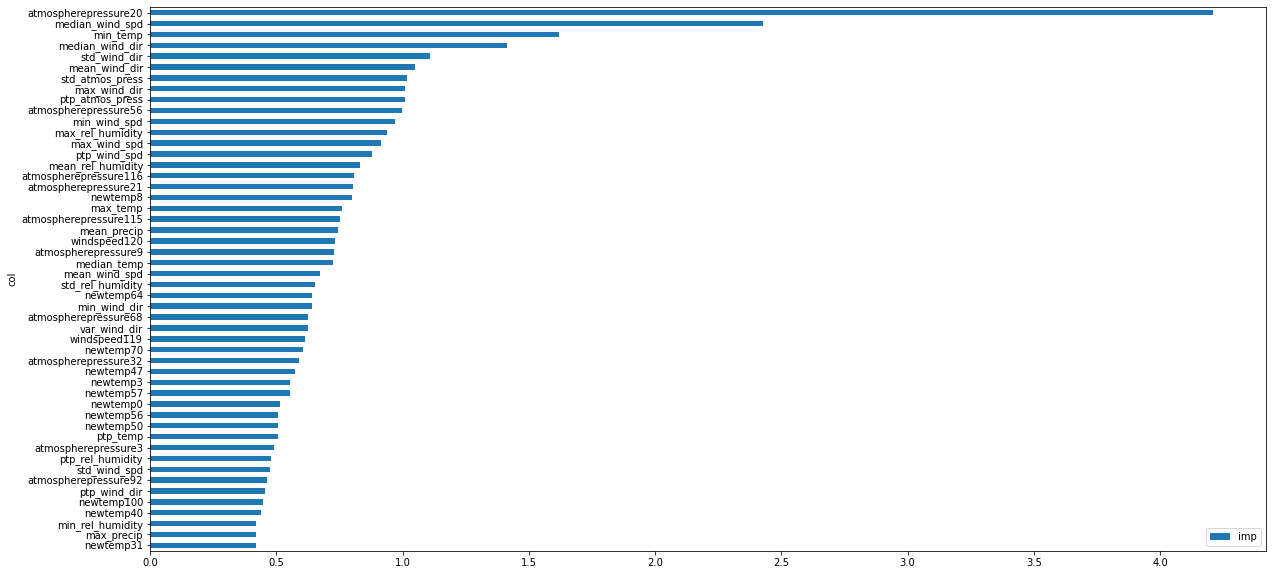

In [ ]:
# Feature Importance
fea_imp = pd.DataFrame({'imp':m2.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))